<a href="https://colab.research.google.com/github/jamesodukoya/BitcoinPricePrediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bitcoin Price Prediction

##Importing the YFinance and Pandas Packages

In [25]:
import yfinance as yf
import os
import pandas as pd
import time

##Download Bitcoin Price History Against the US Dollar

In [36]:
btc_ticker = yf.Ticker("BTC-USD")

if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-17 00:00:00+00:00,36164.824219,36704.484375,35901.234375,36596.683594,22445028430,0.0,0.0
2023-11-18 00:00:00+00:00,36625.371094,36839.281250,36233.312500,36585.703125,11886022717,0.0,0.0
2023-11-19 00:00:00+00:00,36585.765625,37509.355469,36414.597656,37386.546875,12915986553,0.0,0.0


##Clean Up Table

In [37]:
btc.index = pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None)

del btc["Dividends"]
del btc["Stock Splits"]
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,22445028430
2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,11886022717
2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875,12915986553


##Visualize Closing Prices Per Day

<Axes: xlabel='Date'>

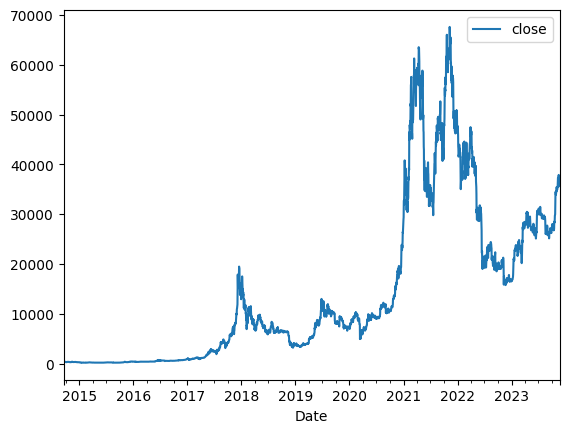

In [38]:
btc.columns = [c.lower() for c in btc.columns]
btc.plot.line(y="close", use_index=True)

##Combining YFinance and Wikipedia Data

In [39]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)


In [40]:
btc = btc.merge(wiki, left_index=True, right_index=True)
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()

1    1772
0    1581
Name: target, dtype: int64

In [43]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,22445028430,0.566667,-0.024696,0.161111,36585.703125,0
2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,11886022717,0.633333,-0.057909,0.194444,37386.546875,1
2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875,12915986553,1.200000,-0.090495,0.227778,37476.957031,1
2023-11-20,37374.074219,37756.820312,36882.531250,37476.957031,20888209068,5.200000,-0.110402,0.254167,36823.914062,0


##Training Our Baseline Model With a Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

##Checking Prediction Accuracy

In [45]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4430379746835443

##Evaluating Error (Backtesting)

In [47]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

##Upgrading Our Model With an XGBoost Classifier

In [48]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

##Evaluating New Precision Score

In [49]:
predictions["predictions"].value_counts()

precision_score(predictions["target"], predictions["predictions"])

0.5057121096725057

##Boosting Accuracy With Trends (New Predictors)

In [50]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [51]:
btc, new_predictors = compute_rolling(btc.copy())
predictions = backtest(btc, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5227272727272727

In [52]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-11-17,0,0
2023-11-18,1,0
2023-11-19,1,0
2023-11-20,0,0


0 -> Price will decrease</br>
1 -> Price will increase